# **Gold Price Prediction**



---



**Importing the Libraries**

In [33]:

!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

In [35]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/sample_data/gld_price_data.csv')

In [36]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.16,84.86,78.47,15.18,1.47
1,1/3/2008,1447.16,85.57,78.37,15.29,1.47
2,1/4/2008,1411.63,85.13,77.31,15.17,1.48
3,1/7/2008,1416.18,84.77,75.50,15.05,1.47
4,1/8/2008,1390.19,86.78,76.06,15.59,1.56


In [37]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.92,124.59,14.06,15.51,1.19
2286,5/9/2018,2697.79,124.33,14.37,15.53,1.18
2287,5/10/2018,2723.07,125.18,14.41,15.74,1.19
2288,5/14/2018,2730.13,124.49,14.38,15.56,1.19
2289,5/16/2018,2725.78,122.54,14.41,15.45,1.18


In [38]:
gold_data.shape

(2290, 6)

In [39]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [40]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.00,2290.00,2290.00,2290.00,2290.00
mean,1654.32,122.73,31.84,20.08,1.28
std,519.11,23.28,19.52,7.09,0.13
min,676.53,70.00,7.96,8.85,1.04
25%,1239.87,109.73,14.38,15.57,1.17
50%,1551.43,120.58,33.87,17.27,1.30
75%,2073.01,132.84,37.83,22.88,1.37
max,2872.87,184.59,117.48,47.26,1.60


In [41]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [42]:
correlation = gold_data.corr()



# correlation values of GLD
print(correlation['GLD'])

SPX        0.05
GLD        1.00
USO       -0.19
SLV        0.87
EUR/USD   -0.02
Name: GLD, dtype: float64


<Axes: >

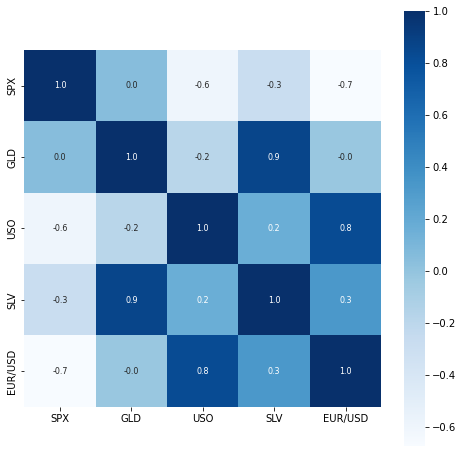

In [43]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: xlabel='GLD', ylabel='Density'>

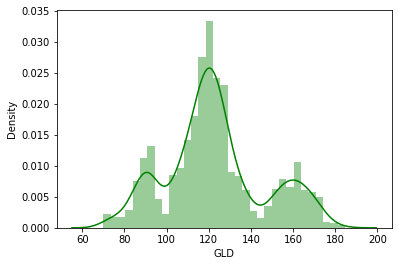

In [44]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')



---



**Splitting the Features and Target**

In [45]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [46]:
print(X)

         SPX   USO   SLV  EUR/USD
0    1447.16 78.47 15.18     1.47
1    1447.16 78.37 15.29     1.47
2    1411.63 77.31 15.17     1.48
3    1416.18 75.50 15.05     1.47
4    1390.19 76.06 15.59     1.56
...      ...   ...   ...      ...
2285 2671.92 14.06 15.51     1.19
2286 2697.79 14.37 15.53     1.18
2287 2723.07 14.41 15.74     1.19
2288 2730.13 14.38 15.56     1.19
2289 2725.78 14.41 15.45     1.18

[2290 rows x 4 columns]


In [47]:
print(Y)

0       84.86
1       85.57
2       85.13
3       84.77
4       86.78
        ...  
2285   124.59
2286   124.33
2287   125.18
2288   124.49
2289   122.54
Name: GLD, Length: 2290, dtype: float64




---



**Splitting into Training data and Test Data**

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)



---



In [49]:

!pip install lazypredict

import lazypredict
from lazypredict.Supervised import LazyClassifier


from lazypredict.Supervised import LazyRegressor
from pandas.plotting import scatter_matrix

reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)
print(models)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 42/42 [03:13<00:00,  4.60s/it]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.99       0.99   1.87   
KNeighborsRegressor                          0.99       0.99   2.40   
RandomForestRegressor                        0.99       0.99   2.44   
LGBMRegressor                                0.99       0.99   2.53   
HistGradientBoostingRegressor                0.99       0.99   2.54   
BaggingRegressor                             0.99       0.99   2.67   
XGBRegressor                                 0.99       0.99   2.68   
ExtraTreeRegressor                           0.98       0.99   2.80   
DecisionTreeRegressor                        0.98       0.98   2.94   
GradientBoostingRegressor                    0.98       0.98   3.52   
AdaBoostRegressor                            0.94       0.94   5.50   
SVR                                          0.94       0.94   5.71   
NuSVR 



---



**MODEL TRAINING**

In [50]:

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor

extra_tree = ExtraTreeRegressor(random_state=0)
reg = BaggingRegressor(extra_tree, random_state=0).fit(
    X_train, Y_train)
reg.score(X_test, Y_test)

0.9891764562004465



---



**Model Evaluvation**

In [51]:
# prediction on Test Data
test_data_prediction = reg.predict(X_test)

In [52]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891764562004465


In [53]:
Y_test = list(Y_test)

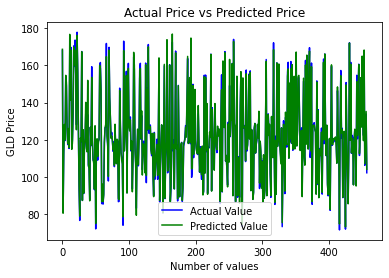

In [54]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()



---



**PREDICTOR**

In [55]:
input_data = (1447.160034,78.470001,15.18,1.471692)
input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = reg.predict(input_data_reshaped)
print(prediction)

[85.2870005]
